In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/vivianpeng/git/molecular_classification/code'

In [5]:
train_dir = "../train_data"
validation_dir = "../test_data"

In [6]:
num_anp_tr = len(os.listdir("../train_data/antineoplastic"))
num_cns_tr = len(os.listdir("../train_data/cns"))
num_cardio_tr = len(os.listdir("../train_data/cardio"))


num_anp_val = len(os.listdir("../test_data/antineoplastic"))
num_cns_val = len(os.listdir("../test_data/cns"))
num_cardio_val = len(os.listdir("../test_data/cardio"))

total_train = num_anp_tr + num_cns_tr
total_val = num_anp_val + num_cns_val

In [7]:
print('total training antineoplastic images:', num_anp_tr)
print('total training cns images:', num_cns_tr)
print('total training cardio images:', num_cardio_tr)

print('total validation antineoplastic images:', num_anp_val)
print('total validation cns images:', num_cns_val)
print('total validation cardio images:', num_cardio_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training antineoplastic images: 751
total training cns images: 751
total training cardio images: 657
total validation antineoplastic images: 350
total validation cns images: 350
total validation cardio images: 131
--
Total training images: 1502
Total validation images: 700


## Set up batch variables

In [8]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2159 images belonging to 3 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 831 images belonging to 3 classes.


## Visualize train data

In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

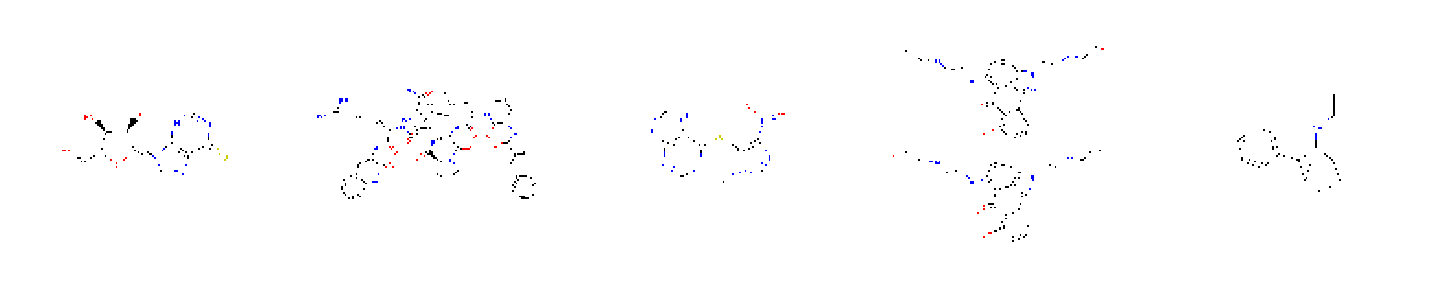

In [14]:
plotImages(sample_training_images[:5])

## Create Model

In [15]:
model = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

## Compile Model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

## Train Model

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 5 steps
Epoch 1/15
11/11 [==============================] - 19s 2s/step - loss: 1.1649 - accuracy: 0.5022 - val_loss: 0.6952 - val_accuracy: 0.4938
Epoch 2/15
11/11 [==============================] - 17s 2s/step - loss: 0.6895 - accuracy: 0.5000 - val_loss: 0.6790 - val_accuracy: 0.4938
Epoch 3/15
11/11 [==============================] - 17s 2s/step - loss: 0.6636 - accuracy: 0.5422 - val_loss: 0.6387 - val_accuracy: 0.5094
Epoch 4/15
11/11 [==============================] - 17s 2s/step - loss: 0.6349 - accuracy: 0.5902 - val_loss: 0.6206 - val_accuracy: 0.6219
Epoch 5/15
11/11 [==============================] - 17s 2s/step - loss: 0.6063 - accuracy: 0.6485 - val_loss: 0.6266 - val_accuracy: 0.5938
Epoch 6/15
11/11 [==============================] - 18s 2s/step - loss: 0.5889 - accuracy: 0.6572 - val_loss: 0.6225 - val_accuracy: 

## Plot accuracy

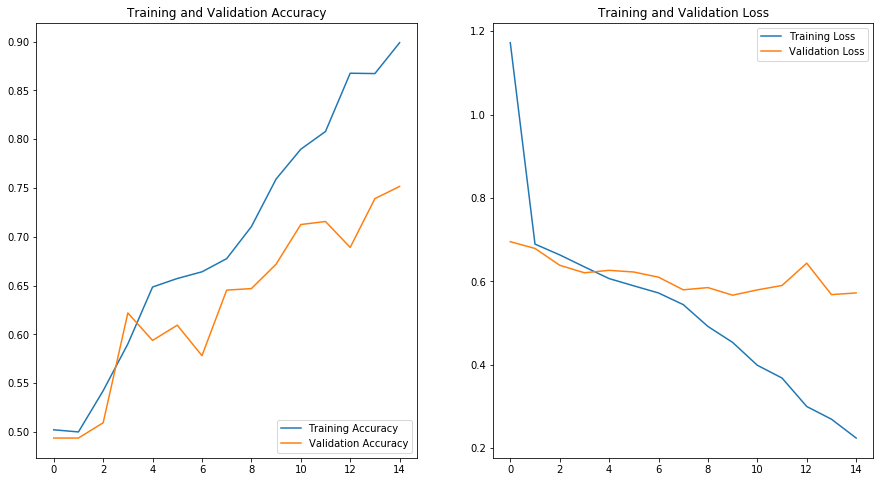

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model for multi-class

In [12]:
model2 = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation = "softmax")
])

In [13]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [14]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
history2 = model2.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 5 steps
Epoch 1/15
11/11 [==============================] - 21s 2s/step - loss: 6.1962 - accuracy: 0.2642 - val_loss: 10.9467 - val_accuracy: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 20s 2s/step - loss: 56.9442 - accuracy: 0.1818 - val_loss: 76.1562 - val_accuracy: 0.0000e+00
Epoch 3/15
11/11 [==============================] - 19s 2s/step - loss: 457.2441 - accuracy: 0.3636 - val_loss: 1603.1286 - val_accuracy: 0.0000e+00
Epoch 4/15
11/11 [==============================] - 18s 2s/step - loss: 3707.0832 - accuracy: 0.2761 - val_loss: 10431.7744 - val_accuracy: 0.0000e+00
Epoch 5/15
11/11 [==============================] - 17s 2s/step - loss: 13939.8165 - accuracy: 0.3681 - val_loss: 28122.8793 - val_accuracy: 0.0000e+00
Epoch 6/15
11/11 [==============================] - 18s 2s/step - loss: 34474.9728 - accur

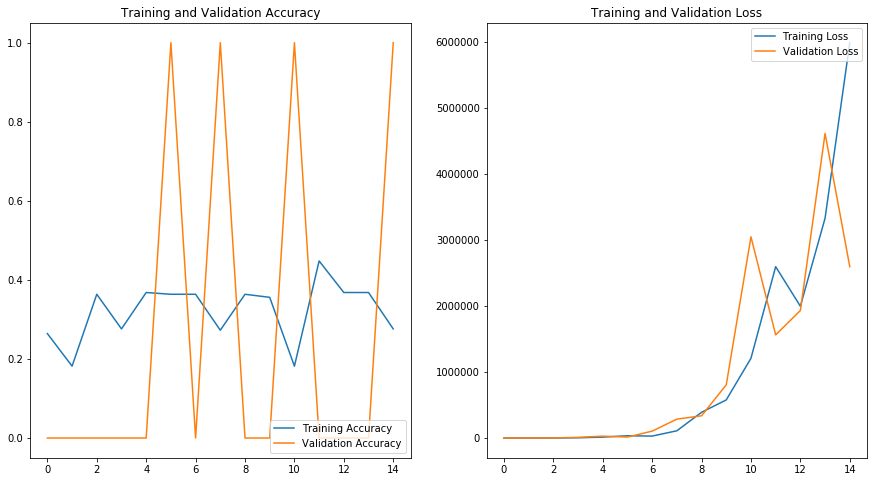

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MINST model

In [31]:
model4 = Sequential([
    Conv2D(16, 3,  activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = "relu"),
    Dense(3, activation = "softmax")
])

In [32]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [33]:
history4 = model4.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 11 steps, validate for 5 steps
Epoch 1/15
11/11 [==============================] - 15s 1s/step - loss: 33.3105 - accuracy: 0.2761 - val_loss: 16.9182 - val_accuracy: 1.0000
Epoch 2/15
11/11 [==============================] - 15s 1s/step - loss: 47.3959 - accuracy: 0.3738 - val_loss: 73.5813 - val_accuracy: 1.0000
Epoch 3/15
11/11 [==============================] - 14s 1s/step - loss: 85.7574 - accuracy: 0.3636 - val_loss: 145.0576 - val_accuracy: 0.0000e+00
Epoch 4/15
11/11 [==============================] - 16s 1s/step - loss: 171.2729 - accuracy: 0.4601 - val_loss: 65.5847 - val_accuracy: 0.0000e+00
Epoch 5/15
11/11 [==============================] - 14s 1s/step - loss: 257.9259 - accuracy: 0.4479 - val_loss: 280.8608 - val_accuracy: 1.0000
Epoch 6/15
11/11 [==============================] - 14s 1s/step - loss: 823.2370 - accuracy: 0.3559 - val_loss: 700.2411 - val_accuracy: 0.0000e+00
Epoch 7/15
11/11 [=====================

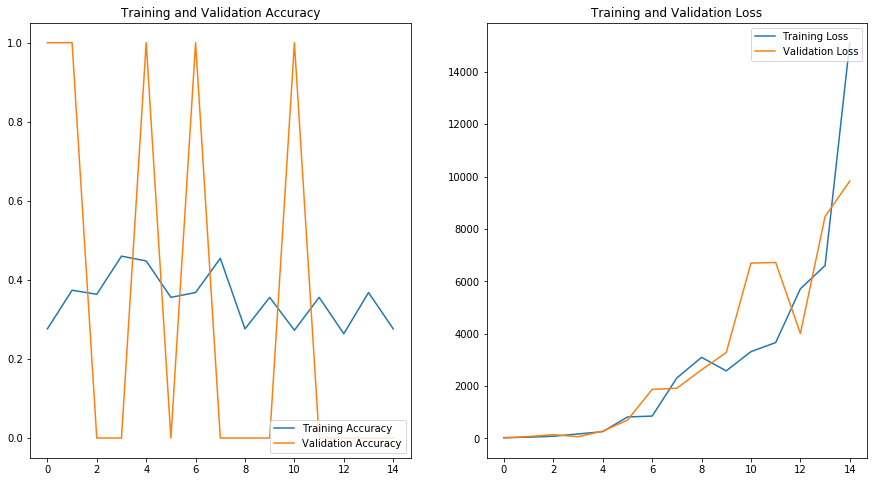

In [34]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss=history4.history['loss']
val_loss=history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Use a pretrained convnet

In [22]:
conv_base = VGG16(weights = "imagenet", 
                 include_top = False,
                 input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 227s 4us/step
